In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
enrollment_df = pd.read_csv("../data/2017-18__-_2021-22_Demographic_Snapshot_20240410.csv")

In [3]:
enrollment_df.head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,89.0%
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,88.8%
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,86.7%
3,01M015,P.S. 015 Roberto Clemente,2020-21,193,0,17,29,29,27,30,...,0.057,0,0.0,44,0.228,21,0.109,161,83.4%,86.4%
4,01M015,P.S. 015 Roberto Clemente,2021-22,179,0,15,30,26,24,22,...,0.067,0,0.0,38,0.212,11,0.061,150,83.8%,87.9%


In [4]:
enrollment_df['Year'].unique()

array(['2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
      dtype=object)

In [5]:
enrollment_df['Economic Need Index'].unique()

array(['89.0%', '88.8%', '86.7%', '86.4%', '87.9%', '67.9%', '68.7%',
       '70.4%', '69.6%', '67.8%', '80.0%', '75.4%', '78.4%', '77.0%',
       '75.3%', '93.7%', '94.8%', 'Above 95%', '94.4%', '76.2%', '73.7%',
       '76.5%', '88.2%', '89.5%', '91.6%', '90.3%', '86.3%', '58.0%',
       '59.4%', '62.7%', '65.1%', '66.3%', '90.1%', '94.6%', '94.2%',
       '91.3%', '90.0%', '93.3%', '92.5%', '91.7%', '91.1%', '91.2%',
       '90.2%', '90.7%', '89.7%', '65.3%', '67.2%', '67.1%', '65.5%',
       '62.1%', '89.9%', '87.5%', '87.8%', '83.4%', '84.2%', '36.9%',
       '34.9%', '38.2%', '39.8%', '43.8%', '84.8%', '81.6%', '81.7%',
       '85.3%', '84.9%', '50.5%', '53.4%', '53.6%', '54.6%', '52.1%',
       '47.8%', '46.0%', '46.2%', '49.1%', '55.4%', '57.9%', '57.2%',
       '60.7%', '85.4%', '82.9%', '82.8%', '85.0%', '83.1%', '80.2%',
       '62.9%', '65.4%', '64.7%', '65.0%', '92.4%', '94.1%', '28.2%',
       '26.9%', '29.1%', '28.7%', '25.6%', '85.5%', '88.6%', '41.4%',
       '40.6%', 

In [6]:
# replacing "Above 95%" to "95%"
enrollment_df['Economic Need Index'] = enrollment_df['Economic Need Index'].replace({'Above 95%' : '95%'})

In [7]:
enrollment_df['Economic Need Index'] = enrollment_df['Economic Need Index'].str.rstrip('%').astype('float') / 100

In [8]:
enrollment_df.head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,0.890
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,0.888
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,0.867
3,01M015,P.S. 015 Roberto Clemente,2020-21,193,0,17,29,29,27,30,...,0.057,0,0.0,44,0.228,21,0.109,161,83.4%,0.864
4,01M015,P.S. 015 Roberto Clemente,2021-22,179,0,15,30,26,24,22,...,0.067,0,0.0,38,0.212,11,0.061,150,83.8%,0.879


In [9]:
enrollment_df[['DBN',"Year","Total Enrollment","Economic Need Index"]]

,DBN,Year,Total Enrollment,Economic Need Index
0,01M015,2017-18,190,0.890
1,01M015,2018-19,174,0.888
2,01M015,2019-20,190,0.867
3,01M015,2020-21,193,0.864
4,01M015,2021-22,179,0.879
...,...,...,...,...
9246,84X730,2017-18,314,0.891
9247,84X730,2018-19,430,0.888
9248,84X730,2019-20,523,0.892
9249,84X730,2020-21,626,0.889


In [10]:

enrollment_df[['DBN',"Economic Need Index"]].sort_values(by='Economic Need Index', ascending=False)

,DBN,Economic Need Index
3075,12X211,0.950
3007,12X044,0.950
1183,05M286,0.950
1184,05M286,0.950
3036,12X067,0.950
...,...,...
284,02M183,0.068
283,02M183,0.068
3754,15K321,0.067
282,02M183,0.064


Text(0, 0.5, 'Enrollment')

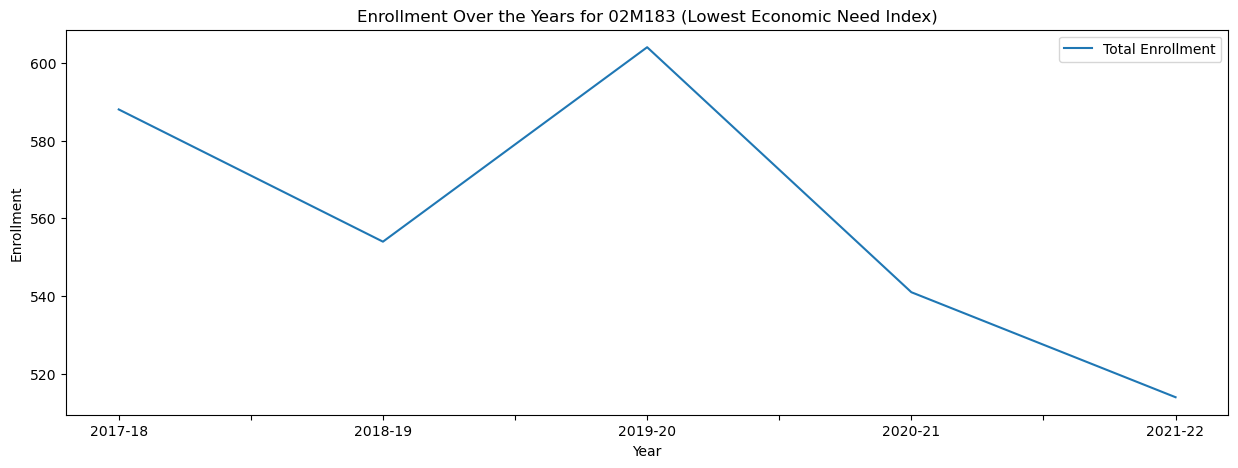

In [11]:
ax = enrollment_df[enrollment_df['DBN']=='02M183'].plot.line(
    x='Year',
    y='Total Enrollment',
    figsize=(15,5),
    title='Enrollment Over the Years for 02M183 (Lowest Economic Need Index)'
)
ax.set_ylabel('Enrollment')

Text(0, 0.5, 'Enrollment')

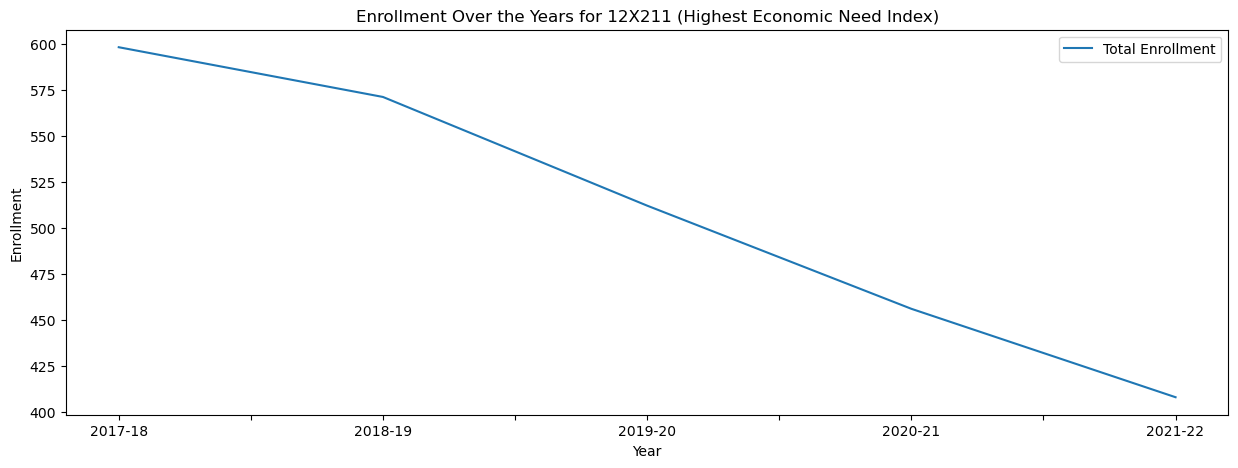

In [12]:
ax = enrollment_df[enrollment_df['DBN']=='12X211'].plot.line(
    x='Year',
    y='Total Enrollment',
    figsize=(15,5),
    title='Enrollment Over the Years for 12X211 (Highest Economic Need Index)'
)
ax.set_ylabel('Enrollment')

In [13]:
enrollment_df.columns

Index(['DBN', 'School Name', 'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

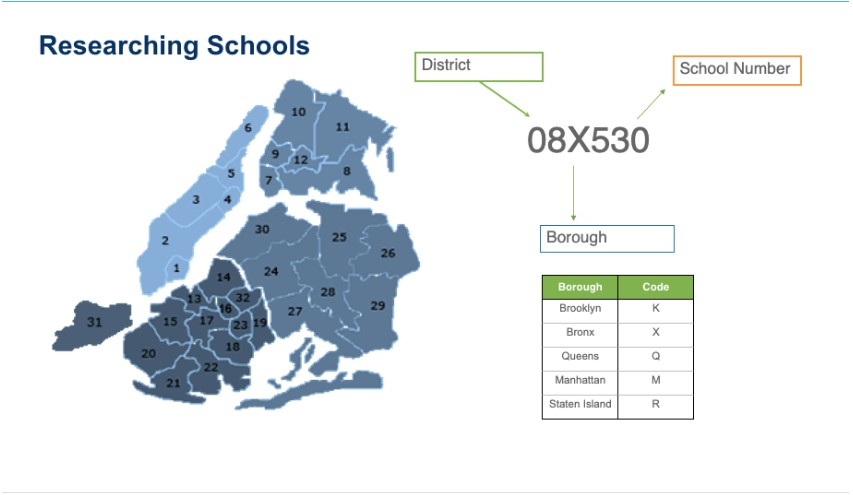

In [14]:
enrollment_df[['DBN','Year', 'Total Enrollment','# Female', '% Female', '# Male', '% Male','# Poverty', '% Poverty', 'Economic Need Index']]

,DBN,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Poverty,% Poverty,Economic Need Index
0,01M015,2017-18,190,99,0.521,91,0.479,161,84.7%,0.890
1,01M015,2018-19,174,85,0.489,89,0.511,147,84.5%,0.888
2,01M015,2019-20,190,94,0.495,96,0.505,155,81.6%,0.867
3,01M015,2020-21,193,101,0.523,92,0.477,161,83.4%,0.864
4,01M015,2021-22,179,96,0.536,83,0.464,150,83.8%,0.879
...,...,...,...,...,...,...,...,...,...,...
9246,84X730,2017-18,314,173,0.551,141,0.449,258,82.2%,0.891
9247,84X730,2018-19,430,232,0.540,198,0.460,363,84.4%,0.888
9248,84X730,2019-20,523,280,0.535,243,0.465,453,86.6%,0.892
9249,84X730,2020-21,626,340,0.543,286,0.457,547,87.4%,0.889


In [15]:
attendance_df = pd.read_csv('../data/2018-2021_Daily_Attendance_by_School_20240410.csv')

In [16]:
attendance_df.sample(5)

,School DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
680831,27Q324,2021-04-19T00:00:00.000,20202021,253.0,239.0,14.0,0.0
335147,31R003,10/08/2019,20192020,667.0,646.0,21.0,0.0
405251,21K225,02/12/2020,20192020,1009.0,945.0,64.0,0.0
417736,15K051,11/07/2018,20182019,1132.0,1118.0,14.0,0.0
415830,12X214,03/03/2020,20192020,1114.0,1031.0,83.0,0.0


In [17]:
attendance_df.rename(columns={'School DBN':'DBN'}, inplace=True)

In [18]:
attendance_df.sample(10)

,DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
405029,20K170,12/16/2019,20192020,1008.0,959.0,48.0,1.0
513545,07X533,2021-05-17T00:00:00.000,20202021,168.0,143.0,25.0,0.0
144205,09X311,12/13/2019,20192020,367.0,336.0,31.0,0.0
722463,32K123,2021-03-15T00:00:00.000,20202021,529.0,486.0,42.0,1.0
375286,10X009,05/17/2019,20182019,824.0,742.0,82.0,0.0
184733,06M211,12/07/2018,20182019,417.0,330.0,87.0,0.0
499327,05M692,2021-03-11T00:00:00.000,20202021,496.0,473.0,23.0,0.0
389246,02M011,03/20/2019,20182019,896.0,858.0,38.0,0.0
209866,10X226,02/28/2019,20182019,447.0,427.0,20.0,0.0
132928,29Q037,11/08/2019,20192020,353.0,321.0,32.0,0.0


In [19]:
attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [20]:
attendance_df['Date'] = attendance_df['Date'].str.split('T').str[0]
# splitting "Time" 'T00:00:00.000' to only have the date

attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [21]:
attendance_df['Date'].sample(10)

610681    2021-05-27
22062     01/25/2019
722685    2021-05-27
728616    2021-04-16
419554    06/26/2019
64202     11/21/2018
276026    09/27/2018
647033    2021-03-10
87618     02/15/2019
269421    10/15/2019
Name: Date, dtype: object

In [22]:
#attendance_df['Date'] = pd.to_datetime(attendance_df['Date'], errors='coerce')
#attendance_df['Date'] = attendance_df['Date'].dt.strftime('%Y-%m-%d')
#attendance_df['Date']

In [23]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736578 entries, 0 to 736577
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DBN         736578 non-null  object 
 1   Date        736578 non-null  object 
 2   SchoolYear  736578 non-null  int64  
 3   Enrolled    736471 non-null  float64
 4   Present     736471 non-null  float64
 5   Absent      736471 non-null  float64
 6   Released    736471 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 39.3+ MB


In [25]:
attendance_df['Date'] = pd.to_datetime(attendance_df['Date'], format='%Y-%m-%d', errors='coerce')

In [26]:
attendance_df.set_index('Date', inplace=True)

In [27]:
# attendance_df['Date'] = pd.to_datetime(attendance_df['Date'])

In [28]:
attendance_df['month'] = attendance_df.index.to_period('M')
attendance_df = attendance_df.reset_index()

In [29]:
attendance_df['Date']

0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
736573   2021-06-21
736574   2021-06-22
736575   2021-06-23
736576   2021-06-24
736577   2021-06-25
Name: Date, Length: 736578, dtype: datetime64[ns]